# Recorte da Imagem para depois Equalizar novamente
* Iremos recortar a imagem para depois equalizar novamente pois melhora a qualidade da equalização;
* Eliminados os espaços em preto desnecessários da imagem, ficando apenas com o recorte da mama;
* Assim, melhora significativamente a qualidade da equalização, e como consequencia, melhora a qualidade do constraste da imagem permitindo visualizar muito mais as estruturas da mama.

In [4]:
import pydicom as dicom
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

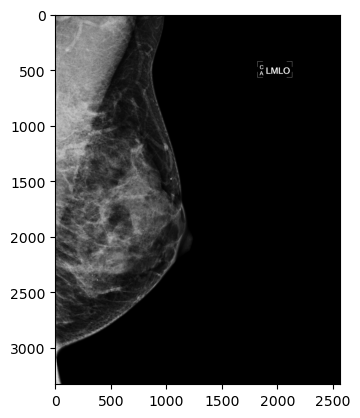

In [40]:
# Fazendo o teste para uma imagem do dataset
localImg = "/mnt/d/ImagensDatasetFredrik/"
img = dicom.dcmread(localImg + "00181_20990909_L_MLO_1.dcm")

imgArray = np.array(img.pixel_array)
plt.imshow(imgArray, cmap=plt.cm.gray)

Colocar funcao do calculo dos thresholds aqui...

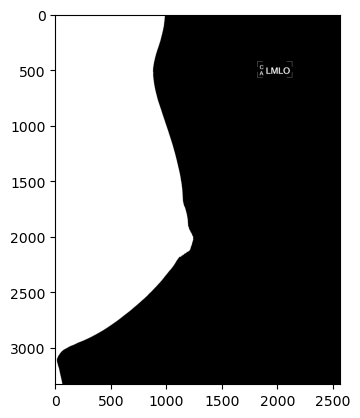

In [43]:
# todos os valores maiores que 1000 irao receber 1, senao recebe 0
ret, temp1 = cv2.threshold(imgArray, 0, np.max(imgArray), cv2.THRESH_BINARY)
arrayThresh = temp1.astype('uint8')

# verificando....
plt.imshow(arrayThresh, cmap=plt.cm.gray);

In [44]:
# Iremos pegar os contornos da imagem
# Utilizando cv2.CHAIN_APPROX_SIMPLE pegamos apenas as bordas do contorno da imagem, assim poupando processamento e memoria
countours = cv2.findContours(arrayThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
countours = imutils.grab_contours(countours)
countours = sorted(countours, key= cv2.contourArea, reverse = True) #pegando as coordenadas que resultam na maior área
rect = cv2.boundingRect(countours[0])

[[[   0   12]]

 [[   0 3327]]

 [[  65 3327]]

 ...

 [[ 986   16]]

 [[ 987   15]]

 [[ 987   12]]]
(0, 12, 1242, 3316)


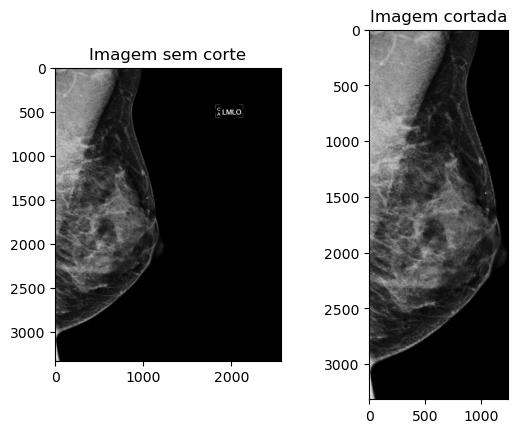

In [51]:
# Coordenadas
x,y,w,h = rect

# Corta imagem com as coordenadas
imgCroped = (imgArray)[y:y+h, x:x+w].copy()

# Comparacao
plt.subplot(1,2,1)
plt.imshow(imgArray, cmap=plt.cm.gray)
plt.title("Imagem sem corte")
plt.subplot(1, 2, 2)
plt.imshow(imgCroped, cmap=plt.cm.gray)
plt.title("Imagem cortada");

$$ (x,y) = ${\texttt{maxval}} $$ {if \(\texttt{src}(x,y) > \texttt{thresh}\)}{0}{otherwise}